In [27]:
#importing all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#the features of the iris plants
columns = ["sepal length","sepal width", "pedal length", "petal width", "Class"]

In [69]:
#Importing the iris plants
df = pd.read_csv("iris.data",names=columns)

In [71]:
df.head()

,sepal length,sepal width,pedal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
df.describe()

,sepal length,sepal width,pedal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   pedal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


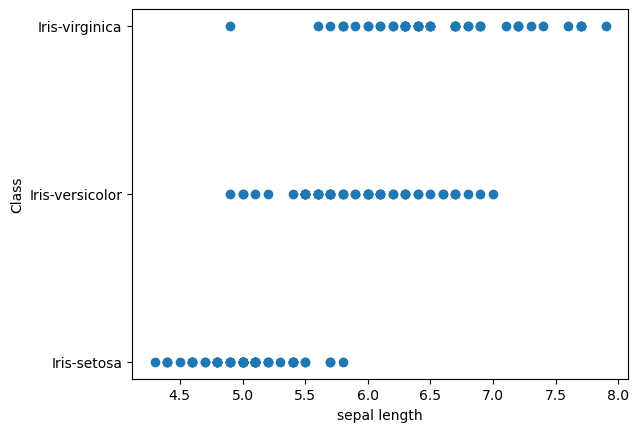

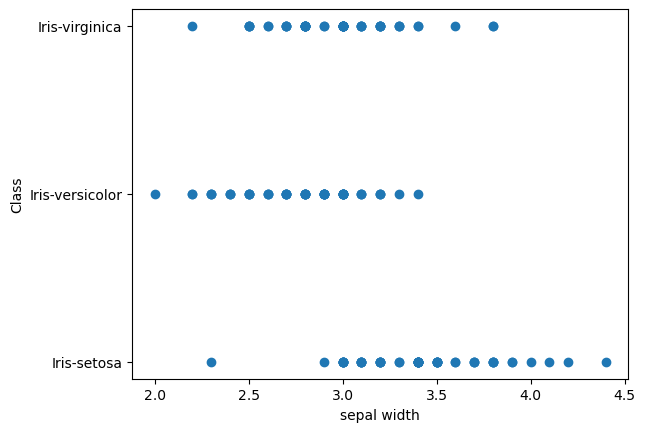

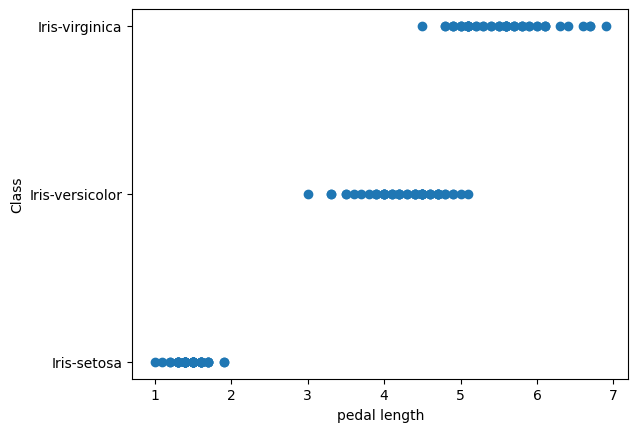

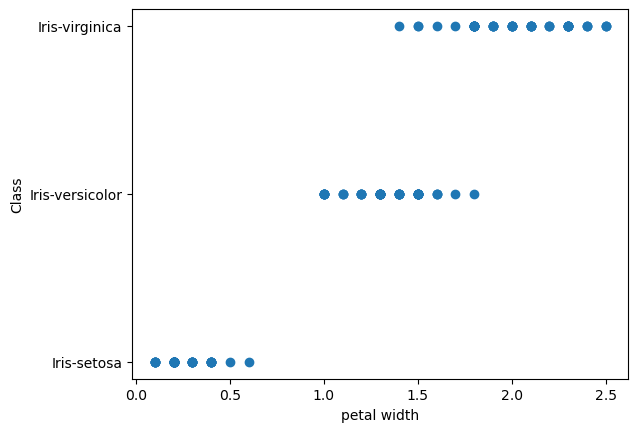

In [77]:
'''
Here we visualise the class of the iris plants against each of its features to observe if there's any
correlation. It seems like pedal are more of a determining factor for tha plant, with both pedal length 
and pedal width showing good separation of the classes. However, all of the factors are reasonably distinguished
so all of the factors should be used in the prediction

'''
for feature in columns[:4]:
    plt.scatter(df[feature],df['Class'])
    plt.ylabel("Class")
    plt.xlabel(feature)
    plt.show()

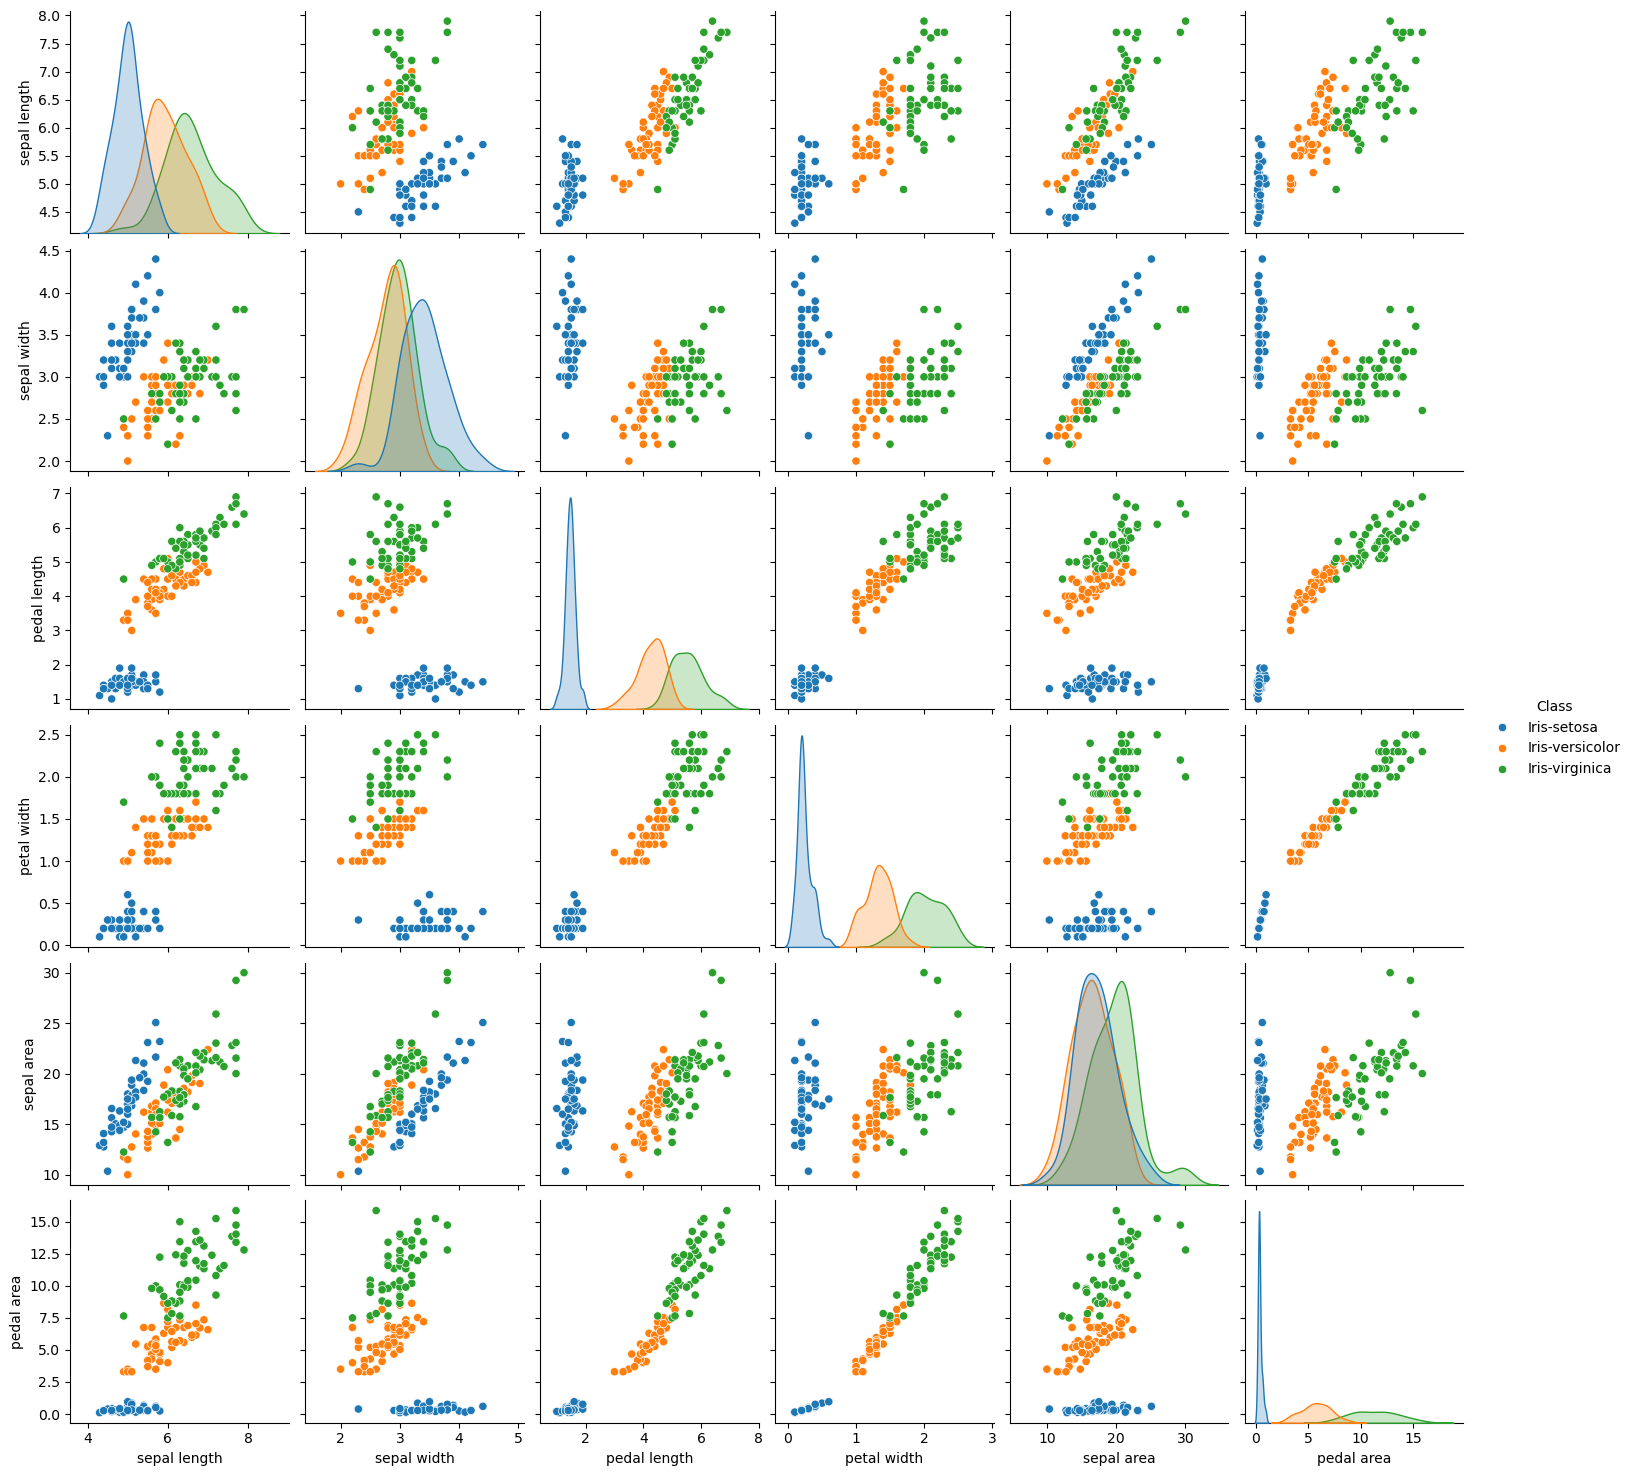

In [85]:
#use the seaborn library to observe the whole dataset
sns.pairplot(df,hue="Class");
plt.show()

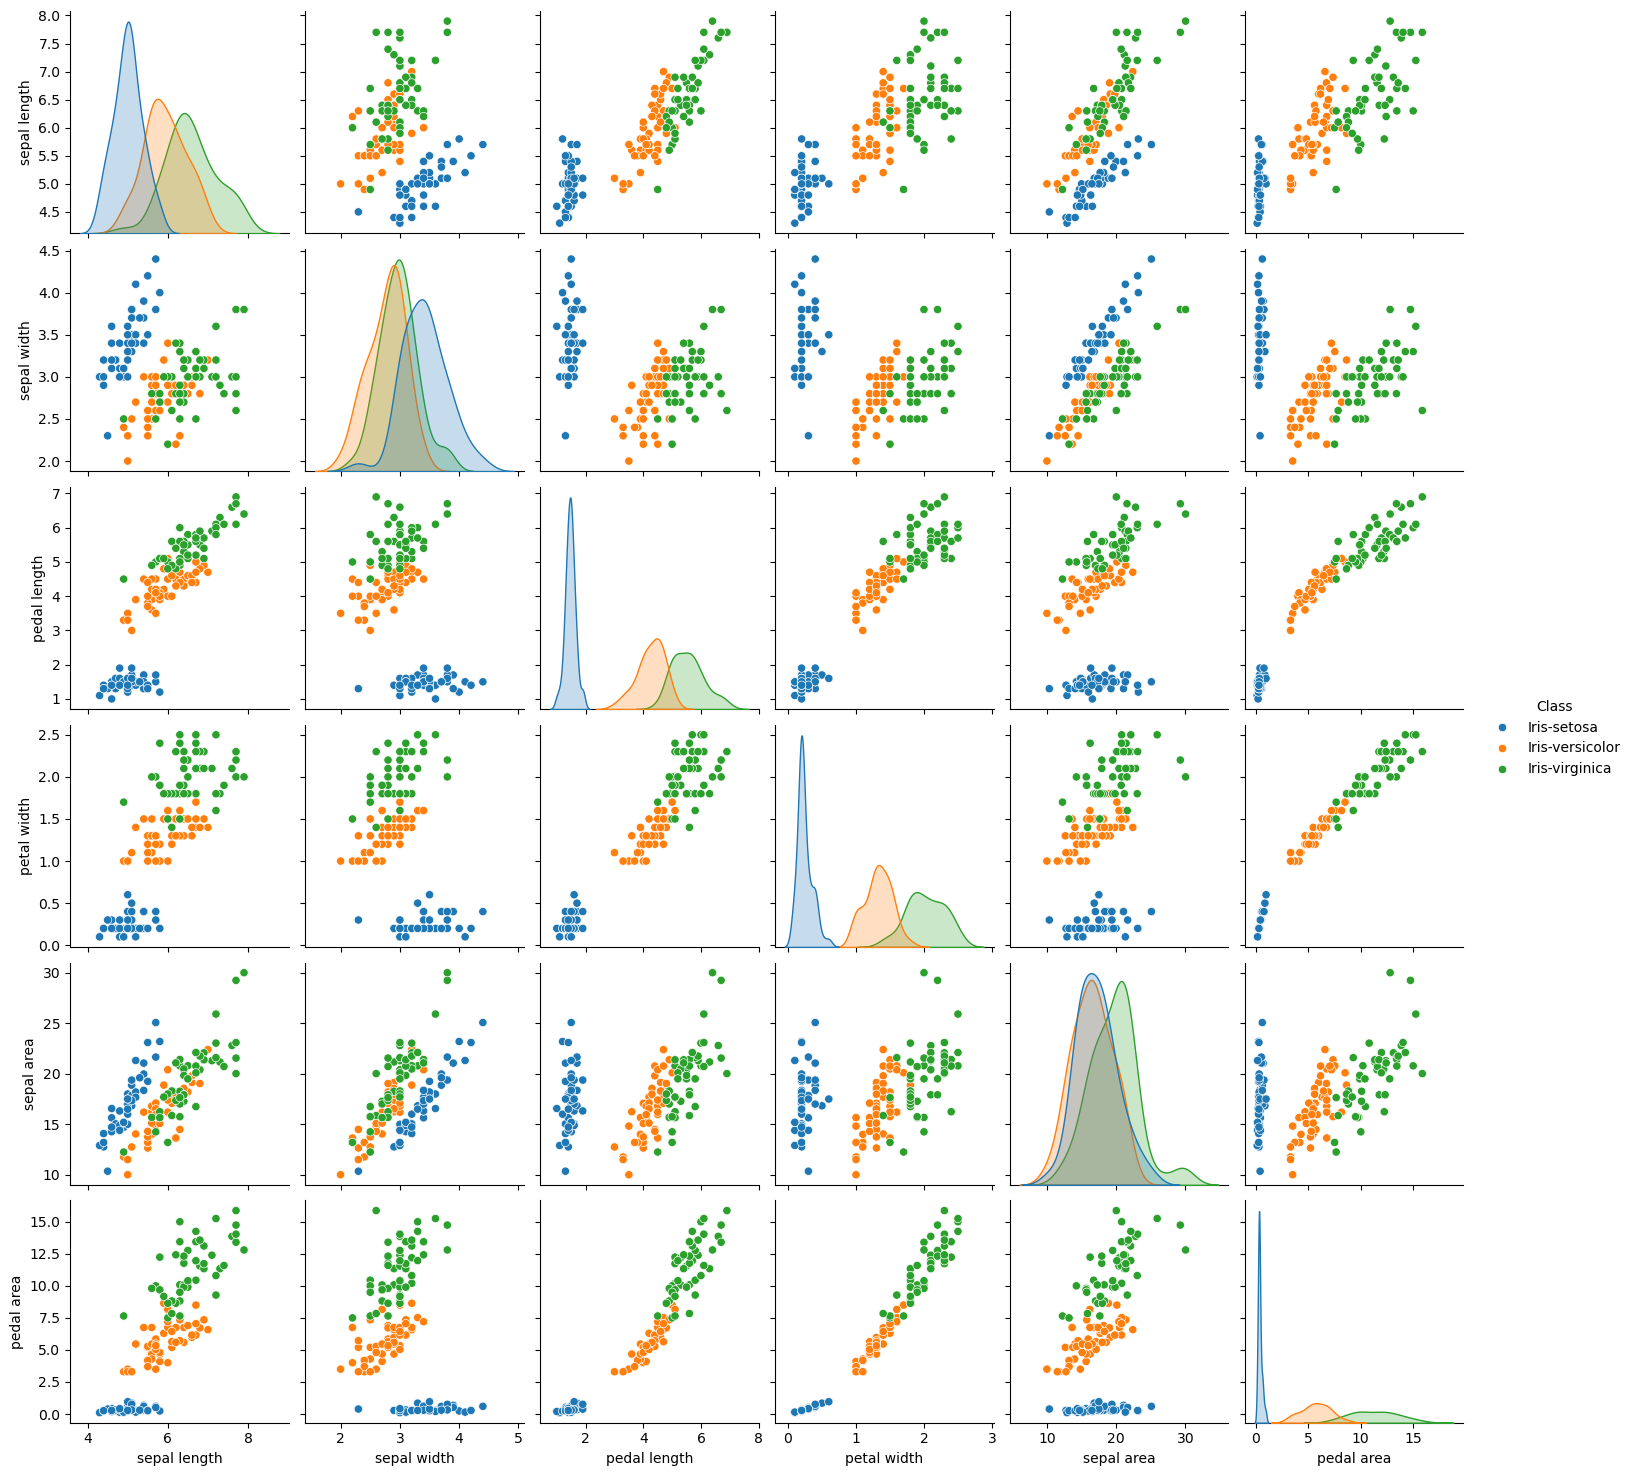

In [90]:
#Let's try engineering the areas oft eh pedal and sepal to see if it's a good indicator of class
sepal_area = df['sepal length']*df['sepal width']
pedal_area = df['pedal length']*df['petal width']
df['sepal area'] = sepal_area
df['pedal area'] = pedal_area
sns.pairplot(df,hue="Class");
plt.show()

In [144]:
#The new featurs don't seem to be adding any extra values, so I will leave them out for the prediction

#Calculate the average of each feature for all classes
average_by_class = df.groupby(df.columns[4]).mean()
average_by_class

,sepal length,sepal width,pedal length,petal width,sepal area,pedal area
Class,,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,17.2088,0.3628
Iris-versicolor,5.936,2.770,4.260,1.326,16.5262,5.7204
Iris-virginica,6.588,2.974,5.552,2.026,19.6846,11.2962


In [158]:
average_by_class['sepal length']

Class
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal length, dtype: float64

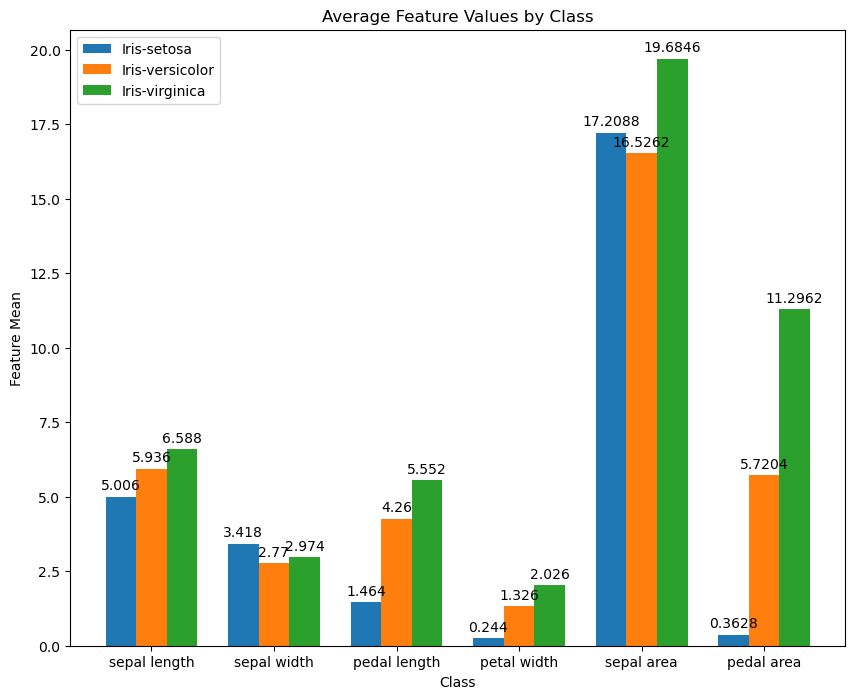

In [178]:
#plot the average 
average_by_class = average_by_class.T
x = np.arange(len(average_by_class.index))
width = 0.25
multiplier = 0
fig,ax = plt.subplots(figsize = (10,8))

for feature,data in average_by_class.items():
    offset = width*multiplier
    rects = ax.bar(x+offset, data,width,label=feature);
    ax.bar_label(rects,padding=3)
    multiplier+=1

ax.set_xticks(x + width * (multiplier - 1) / 2)
ax.set_xticklabels(average_by_class.index)
ax.set_xlabel("Class")
ax.set_ylabel("Feature Mean")
ax.set_title("Average Feature Values by Class")
ax.legend()

plt.show()

In [231]:
#Split the data into train test split
from sklearn.model_selection import train_test_split
Y = df['Class']
X = df.drop('Class',axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [233]:
#training the model
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train,Y_train)

SVC()

In [235]:
#Model Evaluation
predictions = svn.predict(X_test)

#Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.9333333333333333

In [239]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [245]:
#find the average accuracy of many runs
accuracy = []
for i in range(1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
    svn = SVC()
    svn.fit(X_train,Y_train)
    predictions = svn.predict(X_test)
    accuracy.append(accuracy_score(Y_test,predictions))
np.mean(accuracy)

0.9589333333333334